# AI Lab Practical 1: Digital Image and Geometric Transformation

### 1. Introduction: Digital Image
A digital image is a numerical representation of a visual object, composed of picture elements called `pixels`, each
having an intensity value ranging from 0 to 255. In this section, we will focus on two types of images:
* Grayscale Image: Each pixel has a single value [0,1, . . .225], where 0 represents black and 255 represents
white.
* Color Image (RGB): Each pixel is represented by three values Rad, Green, and Blue with intensities ranging
from 0 to 255.

In [2]:
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

**Question 1**: Given a grayscale image and matrix of pixels value below:

**1.1.** What are the dimensions and pixel values of this image? Create an array from the given data and use
Matplotlib to visualize the image in Python. Does the output image look the same as the original image? Why
or why not? If it does not look the same, explain how you can transform it to match the original image.

pixels:  (6, 6)


(np.float64(-0.5), np.float64(5.5), np.float64(5.5), np.float64(-0.5))

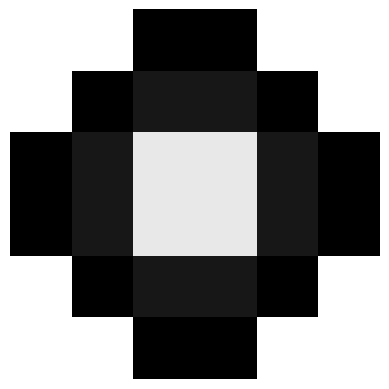

In [3]:
im = np.array([[11, 11, 0, 0, 11, 11],
                [11, 0, 1, 1, 0, 11],
                [0, 1, 10, 10, 1, 0],
                [0, 1, 10, 10, 1, 0],
                [11, 0, 1, 1, 0, 11],
                [11, 11, 0, 0, 11, 11]
                ])

print('pixels: ', im.shape)

plt.imshow(im, cmap='gray')
plt.axis('off')

**1.2.** Now we want reduce the size of original pixel to 4x4 using function `resize(m,n)` in OpenCV, Show result
by plot this image after resize and check the pixels value again. Any different from the original?

new pixels:  (4, 4)


(np.float64(-0.5), np.float64(5.5), np.float64(5.5), np.float64(-0.5))

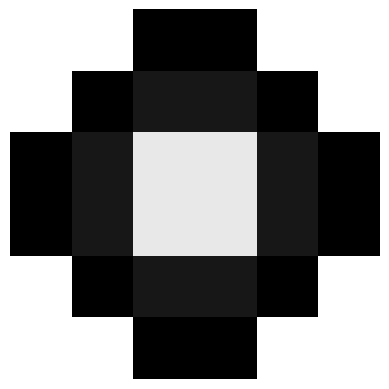

In [4]:
# Resize Image

im = im.astype(float)
re_im = cv.resize(im, (4,4))
print('new pixels: ', re_im.shape)

plt.imshow(im, cmap='gray')
plt.axis('off')

**1.3.** Generate another two-color channel Green and Blue your self by keeping the Red channel has the same data
give in order to create a color image. What do you observe when you switch the color order from (R, G, B) to
(B, G, R) using a subplot layout of 1×2 (1 row and 2 columns)?

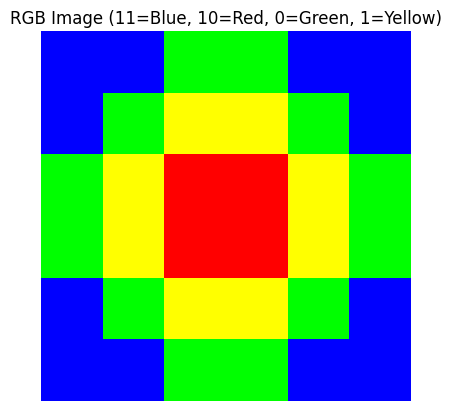

In [5]:
def to_rgb(pixels):
    # Create an empty RGB array (same height & width, 3 color channels)
    h, w = pixels.shape
    rgb = np.zeros((h, w, 3), dtype=np.uint8)
    
    # Define mapping: [R, G, B]
    for i in range(h):
        for j in range(w):
            val = pixels[i, j]
            if val == 11:      # Blue
                rgb[i, j] = [0, 0, 255]
            elif val == 10:    # Red
                rgb[i, j] = [255, 0, 0]
            elif val == 0:     # Green
                rgb[i, j] = [0, 255, 0]
            elif val == 1:     # Yellow (mix of Red + Green)
                rgb[i, j] = [255, 255, 0]
            else:
                rgb[i, j] = [0, 0, 0]  # Default black if unmatched
    return rgb

rgb_image = to_rgb(im)

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Image (11=Blue, 10=Red, 0=Green, 1=Yellow)")
plt.axis('off')
plt.show()

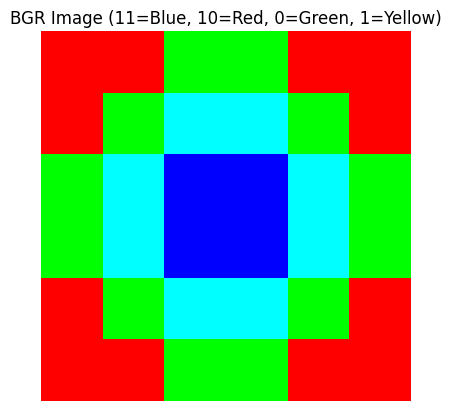

In [6]:
bgr_image = cv.cvtColor(rgb_image, cv.COLOR_RGB2BGR)

plt.imshow(bgr_image)
plt.title("BGR Image (11=Blue, 10=Red, 0=Green, 1=Yellow)")
plt.axis('off')
plt.show()

**Question 2:** Given that color (R-G-B) image `vo.png` from data folder name `image_test_1` you can use your picture. In this section we will work on real properties image and relation between color (R-G-B) to grayscale. For loading this image and setting name `im_cv` by using function `cv2.imread(“vo.png”)` in `OpenCV`, `im_plt` by using function `plt.imread(“vo.png”)` in `matplotlib`. Let an array name `arr_image` to be keep all intensity pixels ($R_0$, $G_0$, $B_0$).


**2.1.** Display this image using library `OpenCV` and `matplotlib`. Any different from both result and give remark?

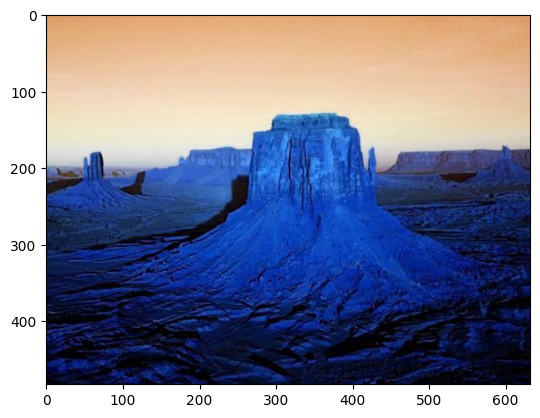

In [7]:
im_cv = cv.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP1/image_test_1/vo.png")
plt.imshow(im_cv)

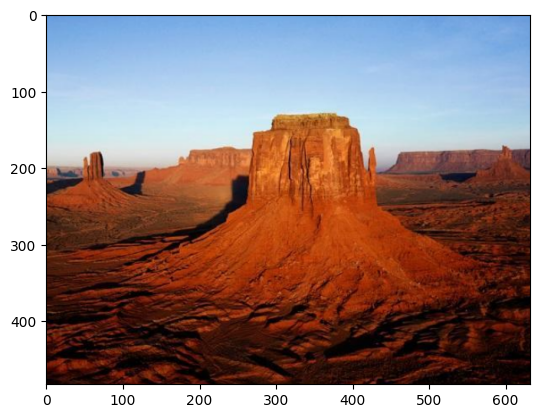

In [8]:
im_plt = plt.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP1/image_test_1/vo.png")
plt.imshow(im_plt)

In [9]:
arr_image = cv.cvtColor(im_cv, cv.COLOR_RGB2BGR)
arr_image

array([[[102, 157, 222],
        [ 99, 154, 219],
        [ 98, 153, 218],
        ...,
        [100, 154, 218],
        [100, 153, 218],
        [ 99, 153, 217]],

       [[102, 157, 222],
        [100, 155, 220],
        [ 99, 154, 219],
        ...,
        [100, 154, 218],
        [100, 154, 218],
        [100, 154, 218]],

       [[ 99, 154, 219],
        [100, 155, 220],
        [100, 155, 220],
        ...,
        [101, 155, 219],
        [101, 155, 219],
        [101, 155, 219]],

       ...,

       [[ 16,   7,   5],
        [ 12,   3,   1],
        [ 12,   2,   1],
        ...,
        [ 30,  13,   9],
        [ 27,  11,   8],
        [ 23,   8,   6]],

       [[ 19,   7,   4],
        [ 15,   3,   1],
        [ 14,   1,   0],
        ...,
        [ 27,   5,   3],
        [ 27,   6,   4],
        [ 28,   9,   5]],

       [[ 23,   7,   4],
        [ 18,   4,   1],
        [ 16,   2,   0],
        ...,
        [ 29,   3,   0],
        [ 29,   4,   1],
        [ 30,   8,   3]]

**2.2.** Now let convert from color to grayscale by setting an array name `arr_gray1` is defined by $\frac{1}{3} (R_0 + G_0 + B_0)$
and `arr_gray2` is defined by the linear combination $0.2126R_0 + 0.7152G_0 + 0.0722B_0$ . Plot these images following two arrays above and finally using function directly `imread("image_name", cv2.IMREAD_GRAYSCALE)`

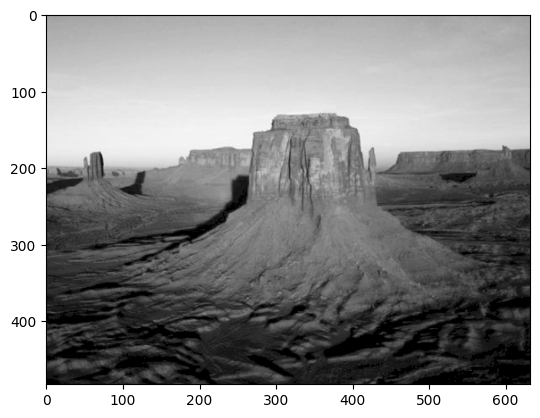

In [17]:
im_gray = cv.imread("/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP1/image_test_1/vo.png", cv.IMREAD_GRAYSCALE)
plt.imshow(im_gray, cmap="gray")

**2.3.** Now loading the image name `a.png` from folder name `image_test_1`, checking the image properties it is a grayscale or color (R-G-B)? why? It not grayscale so transform this image to grayscale.

In [23]:
path = "/Users/somchannreaksmey/Documents/I4-AMS-B/Artificial Intelligence/TP1/image_test_1/a.png"

im_a_cv = cv.imread(path)

print("cv.imread -> shape:", im_a_cv.shape, "dtype:", im_a_cv.dtype)
# Determine type using cv.imread result
if im_a_cv.ndim == 2:
    print("Detected (from cv.imread): Grayscale image (2D array).")
elif im_a_cv.ndim == 3 and im_a_cv.shape[2] == 3:
    # check if all channels are identical -> effectively grayscale
    if np.allclose(im_a_cv[...,0], im_a_cv[...,1]) and np.allclose(im_a_cv[...,0], im_a_cv[...,2]):
        print("Detected (from cv.imread): 3-channel image but all channels equal -> effectively grayscale.")
    else:
        print("Detected (from cv.imread): Color image (BGR, 3 channels).")

cv.imread -> shape: (451, 447, 3) dtype: uint8
Detected (from cv.imread): Color image (BGR, 3 channels).


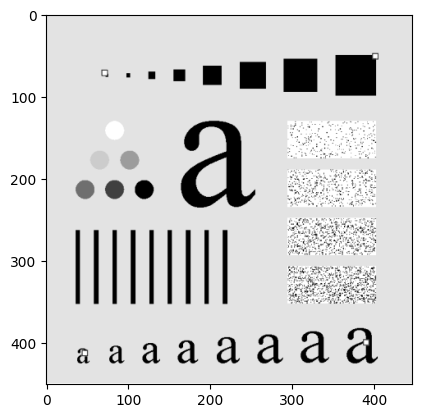

In [24]:
gray_from_cv = cv.cvtColor(im_a_cv, cv.COLOR_BGR2GRAY)
plt.imshow(gray_from_cv, cmap="gray")

## 2. Cropping an image
In objective to extract a specific region of interest (ROI) from an image using slicing operations. Concept of cropping an image means selecting a rectangular portion from the original image based on pixel coordinates:

$cropped = image[y_{start}, y_{end}, x_{start}, x_{end}]$

* $y$ is represent vertical axis row from top to bottom
* $x$ is represent horizontal axis column from left to right
* $image$ loading from your image dataset

Given an image name `a.png` from folder name `image_test_1`, as shown in picture below:

* The vertical coordinate $y \in [0, 451]$
* The horizontal coordinate $x \in [0, 447]$  

![Screenshot 2025-10-21 at 3.14.42 in the afternoon.png](<attachment:Screenshot 2025-10-21 at 3.14.42 in the afternoon.png>)
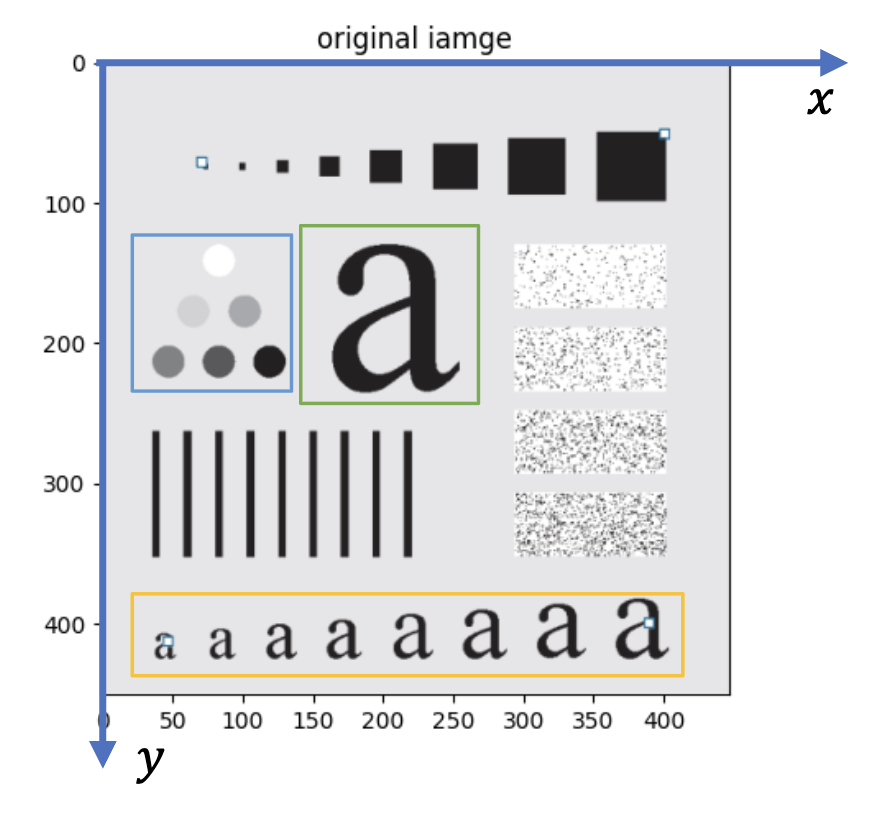

**Question1:** Based on the original image, crop the regions defined by the bounding boxes corresponding to each color green, blue, and orange

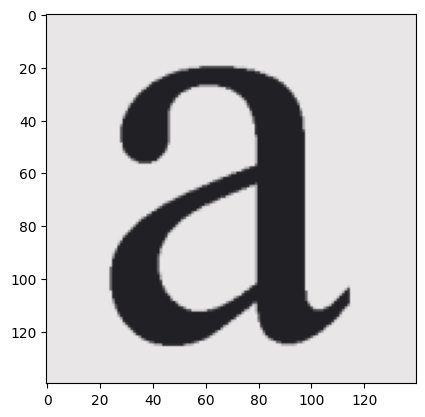

In [30]:
image = cv.imread(path)
cropped_green = image[110:250, 140:280]
plt.imshow(cropped_green)

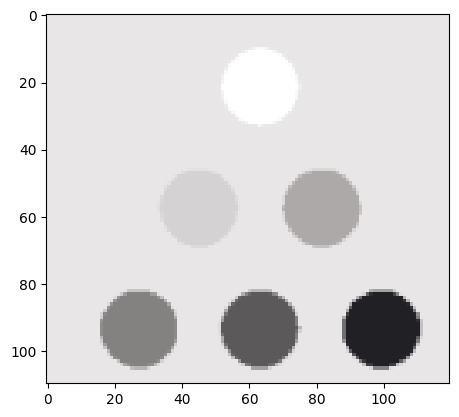

In [32]:
cropped_blue = image[120:230, 20:140]
plt.imshow(cropped_blue)

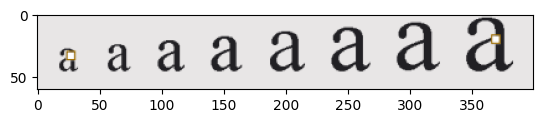

In [40]:
cropped_orange = image[380:440, 20:420]
plt.imshow(cropped_orange)

**Question2:** Based on bounding boxes corresponding to each color green, blue, and orange, try to crop with another shape of bounding box such as circle.

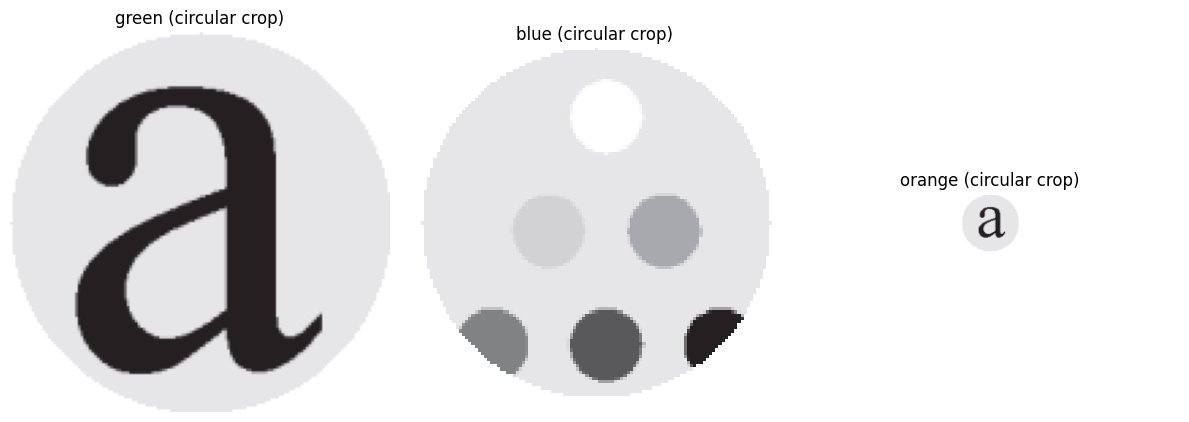

In [41]:
def circular_crop_region(img, y1, y2, x1, x2, bg_color=(255,255,255)):
    # Crop rectangular region then apply circular mask
    region = img[y1:y2, x1:x2].copy()
    h, w = region.shape[:2]
    center = (w // 2, h // 2)
    radius = min(h, w) // 2

    mask = np.zeros((h, w), dtype=np.uint8)
    cv.circle(mask, center, radius, 255, -1)           # filled circle mask
    mask_bool = mask.astype(bool)

    out = np.full_like(region, bg_color, dtype=region.dtype)
    out[mask_bool] = region[mask_bool]
    return out

# bounding boxes used earlier
boxes = {
    "green": (110, 250, 140, 280),
    "blue":  (120, 230,  20, 140),
    "orange":(380, 440,  20, 420),
}

circrops = {}
for name, (y1,y2,x1,x2) in boxes.items():
    circrops[name] = circular_crop_region(image, y1, y2, x1, x2)

# Display side-by-side (convert BGR->RGB for correct colors in matplotlib)
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
for ax, (name, crop) in zip(axs, circrops.items()):
    ax.imshow(cv.cvtColor(crop, cv.COLOR_BGR2RGB))
    ax.set_title(f"{name} (circular crop)")
    ax.axis("off")
plt.tight_layout()

### 3. Geometric Transformation

Geometric operation of digital image consists of two basic operations `spatial (plan)` for transformation coordinate and `intensity interpolation` for assigned intensity values to spatially transform pixels. In this part we introduce geometric transformation operation:

$\begin{bmatrix}x'\\y'\\z'\end{bmatrix} = A\begin{bmatrix}x\\y\\1\end{bmatrix} = \begin{bmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\0&0&1\end{bmatrix} \begin{bmatrix}x\\y\\1\end{bmatrix}$

For the image has provided name a.png from folder name image_test_1, we will work on many transformation
methods according to the matrix A was given.

**Question 1:**

Given that a matrix $A = \begin{bmatrix}1&0&t_x\\0&1&t_y\\0&0&1\end{bmatrix}$ for image translation then the new coordinates are defined as $\begin{cases}x'=x+t_x\\y'=y+t_y\end{cases}$

Testing any values of $t_x$ and $t_y$ and then plot this image using matplotlib. For example, by replacing $(t_x, t_y)=(80,30)$ and $(30, 0)$

**Question 2:**
Given that a matrix $A = \begin{bmatrix}\cos(\theta)&-\sin(\theta)&0\\\sin(\theta)&\cos(\theta)&0\\0&0&1\end{bmatrix}$ for image translation then the new coordinates are defined as $\begin{cases}x'=x\cos(\theta)+y\sin(\theta)\\y'=x\sin(\theta)+y\cos(\theta)\end{cases}$

**2.1.** Testing any values of $\theta = [30^o, 45^o, 60^o]$ and then plot this image using matplotlib as picture below

**2.2.** Combine both technique rotation and translation at the same time by testing the parameter value $(\theta, t_x, t_y) = [(300, 30,60), (450, 0,80)] $ and then using a subplot layout of 1×3 (1 row and 3 columns) of the
result original image, and another two receive from the transformation.


**Question 2:**

Given that a matrix $A_v = \begin{bmatrix}1&s_v&0\\0&1&0\\0&0&1\end{bmatrix}$ and $A_h = \begin{bmatrix}1&0&0\\s_h&1&0\\0&0&1\end{bmatrix}$ represent a `shear` vertical and horizontal respectively. The new coordinates are defined as:

$\begin{cases}x'_v=x+s_vy\\y'_v=y\end{cases}$ and $\begin{cases}x'_h=x\\y'_h=s_hx+y\end{cases}$

Testing the value of $s_v=0.5$ and $s_h=0.5$ then subplot layout 1×3 (1 row and 3 columns) as picture given